<a href="https://colab.research.google.com/github/juarezefren/python101/blob/main/Comparar_fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resumen de estadisticos que se pueden obtener para comparar dos conjuntos de datos, en este caso, los obtenidos con reflection randon, el gpt de apoyo esta en:

https://chatgpt.com/share/683fa95a-4e0c-8006-b2ee-721316e258ab



In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("https://raw.githubusercontent.com/juarezefren/datasets/refs/heads/main/fitness_comparison.csv")

df.head()


,Reflection,Random
0,0.0023,0.0152
1,0.0011,0.0175
2,0.0035,0.0138
3,0.0020,0.0146
4,0.0018,0.0161


In [ ]:
# Calcular estadísticas
estadisticas = pd.DataFrame({
    "Media": df.mean(),
    "Mediana": df.median(),
    "Desviación estándar": df.std(),
    "Rango intercuartílico (IQR)": df.quantile(0.75) - df.quantile(0.25),
    "Rango": df.max() - df.min()
})

# Mostrar resultados
print("Estadísticas descriptivas:\n")
print(estadisticas)

Estadísticas descriptivas:

               Media  Mediana  Desviación estándar  \
Reflection  0.002052   0.0020             0.000717   
Random      0.014680   0.0146             0.001429   

            Rango intercuartílico (IQR)   Rango  
Reflection                       0.0011  0.0026  
Random                           0.0021  0.0051  


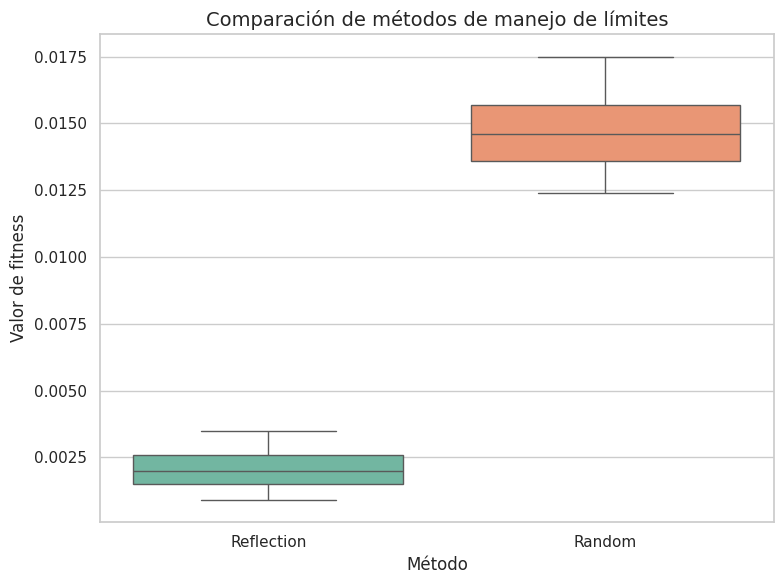

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráfico
sns.set(style="whitegrid")

# Crear boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, palette="Set2")
plt.title("Comparación de métodos de manejo de límites", fontsize=14)
plt.ylabel("Valor de fitness", fontsize=12)
plt.xlabel("Método", fontsize=12)
plt.tight_layout()

# Mostrar gráfico
plt.show()

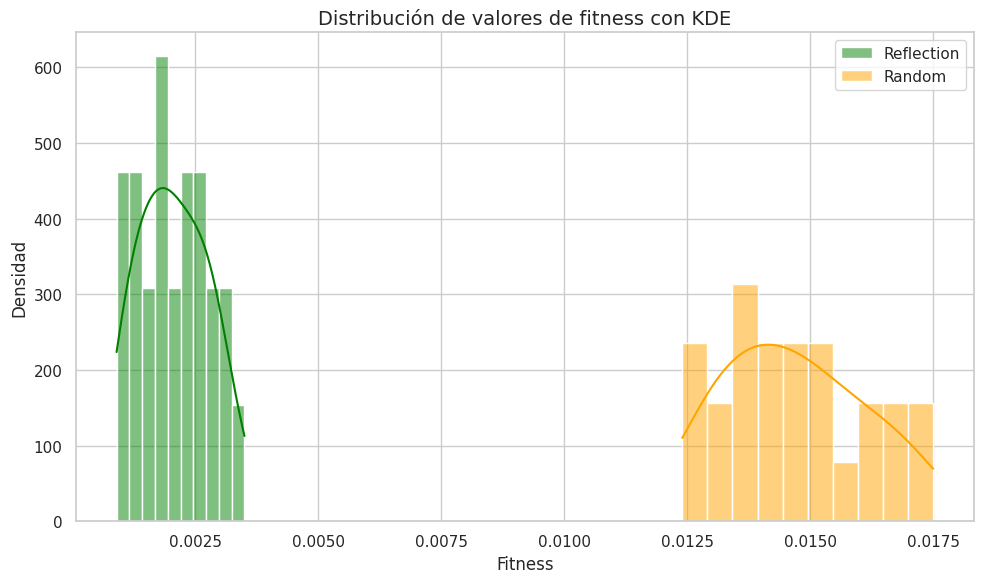

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(10, 6))

# Histograma con KDE para cada método
sns.histplot(df["Reflection"], kde=True, color="green", label="Reflection", stat="density", bins=10)
sns.histplot(df["Random"], kde=True, color="orange", label="Random", stat="density", bins=10)

# Personalización
plt.title("Distribución de valores de fitness con KDE", fontsize=14)
plt.xlabel("Fitness", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()

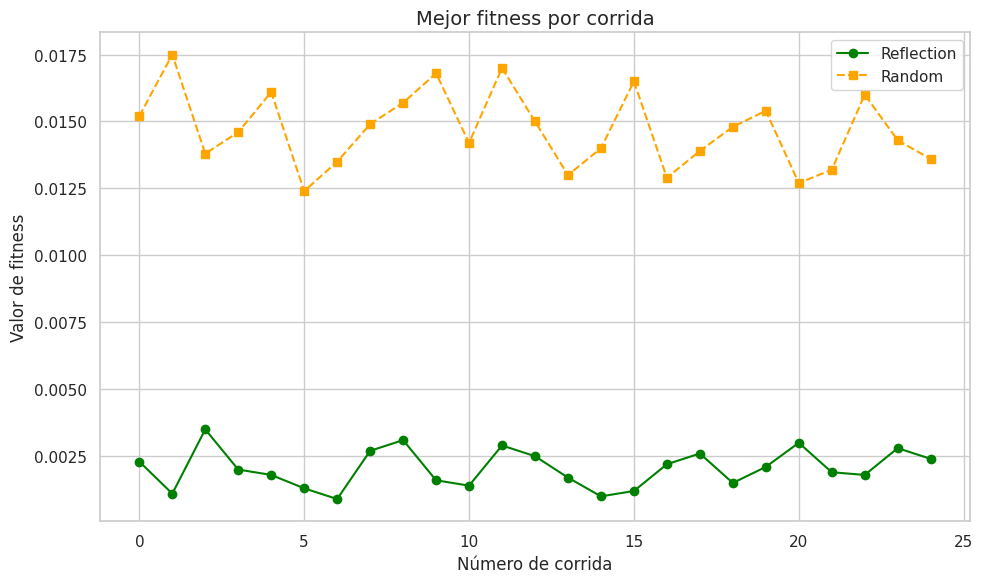

In [ ]:
# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df["Reflection"], marker='o', linestyle='-', color='green', label="Reflection")
plt.plot(df["Random"], marker='s', linestyle='--', color='orange', label="Random")

# Personalización
plt.title("Mejor fitness por corrida", fontsize=14)
plt.xlabel("Número de corrida", fontsize=12)
plt.ylabel("Valor de fitness", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()

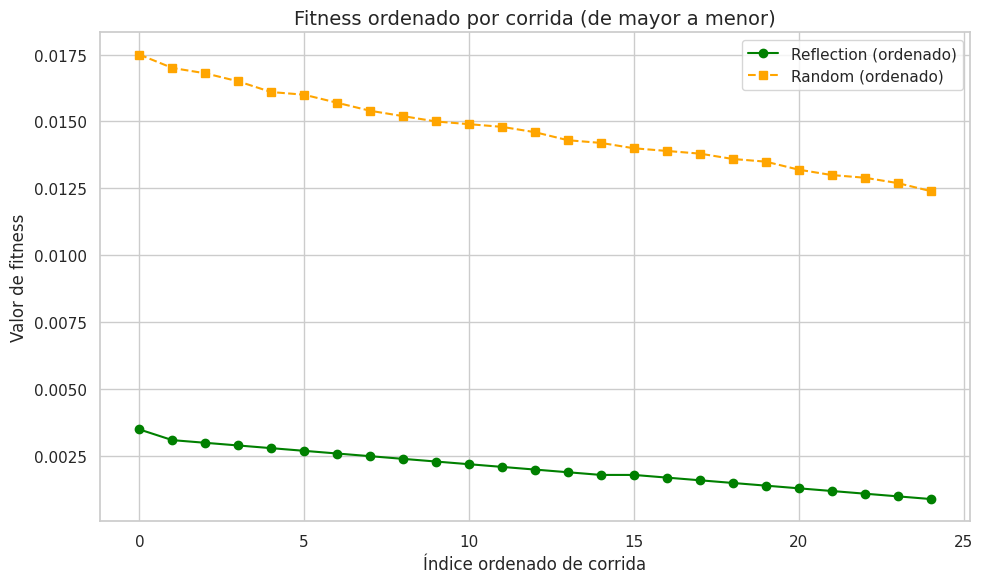

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Ordenar de mayor a menor
reflection_sorted = df["Reflection"].sort_values(ascending=False).reset_index(drop=True)
random_sorted = df["Random"].sort_values(ascending=False).reset_index(drop=True)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(reflection_sorted, marker='o', linestyle='-', color='green', label="Reflection (ordenado)")
plt.plot(random_sorted, marker='s', linestyle='--', color='orange', label="Random (ordenado)")

# Personalización
plt.title("Fitness ordenado por corrida (de mayor a menor)", fontsize=14)
plt.xlabel("Índice ordenado de corrida", fontsize=12)
plt.ylabel("Valor de fitness", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [ ]:

from scipy.stats import wilcoxon


# Prueba de Wilcoxon (pareada, no paramétrica)
statistic, p_value = wilcoxon(df["Reflection"], df["Random"])

# Mostrar resultados
print(f"Estadístico de Wilcoxon: {statistic}")
print(f"Valor p: {p_value}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Diferencia significativa: se rechaza H0.")
else:
    print("No hay diferencia significativa: no se rechaza H0.")


Estadístico de Wilcoxon: 0.0
Valor p: 1.2223622842585624e-05
Diferencia significativa: se rechaza H0.
